In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


$q(x) = 1000(x_{2} - x_1^2)^2 + (2-x_1^2)^2$

# ***Part 2 :*** *We cannot find the closed form solution for this problem*


***Remarks :*** *In order to apply ELS we will need an close form expression for the value of $\eta$ that minimizes $q(x + \eta p)$ where $p$ is the descent direction. But we observe that the function $q(x)$ is not quadratic here and when we find the function to optimize $\eta$ i.e $ \ \ g(\eta) = f(x + \eta \nabla f(x))$, it is not quadratic. We cannot even ensure the convexity of this function let alone finding the optimized value.*


 \begin{array}{l}
q( x) \ =\ 1000\left( x_{2} -x^{2}_{1}\right)^{2} +( 2-x_{1})^{2}\\
\frac{\partial q}{\partial x_{1}} \ =\ 1000\left( 4x^{3}_{1} -4x_{1} x_{2}\right) +2x_{1} -4\\
\frac{\partial q}{\partial x_{2}} =2000\left( x_{2} -x^{2}_{1}\right)\\
q( X-\eta \nabla q( X)) \ =\ q( z_{1} ,z_{2}) \ say\\
\\
where\ ,\ z_{1} \ =\ x_{1} -\eta \frac{\partial q}{\partial x_{1}} =\ x_{1} -\eta \left[ 1000\left( 4x^{3}_{1} -4x_{1} x_{2}\right) +2x_{1} -4\right]\\
and\ ,\ \ \ z_{2} \ =\ x_{2} -\eta \frac{\partial q}{\partial x_{2}} =\ x_{2} -\eta \left[ 2000\left( x_{2} -x^{2}_{1}\right)\right]\\
Now\ in\ exact\ line\ search\ we\ want\ to\ find\ \eta \ such\ that\ it\ minimizes\ this\ function\\
q( Z) ,\ i.e\\
\\
h( \eta ) \ =\ q( z_{1} ,z_{2}) \ =\ 1000\left( z_{2} -z^{2}_{1}\right)^{2} +( 2-z_{1})^{2}\\
We\ see\ that\ this\ function\ cannot\ be\ even\ shown\ convex\ and\ we\ are\ unable\ to\ find\ any\ close\ form\ solution
\end{array}


# ***Part 3 :*** *Code for solving $min \ q(x) $using backtracking*

In [3]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return 1000*((x[1] - x[0]**2)**2) + (2-x[0])**2

def evalg(x):
  assert type(x) is np.ndarray and len(x) == 2
  a_ = 1000*(4*(x[0]**3) - 4*x[0]*x[1]) + 2*x[0] - 4
  b_ = 2000*(x[1] - x[0]**2)
  return np.array([a_, b_])


def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*p) > (evalf(x) + gamma * alpha * np.dot(gradf.T, p)) ):
    alpha = alpha*rho
  
  return alpha


def find_minimizer(start_x, tol, alpha, rho, gamma):
  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol>=0 

  x = start_x
  g = evalg(x)
  k = 0
  
  while (np.linalg.norm(g) > tol):
    step_length = compute_steplength_backtracking(x,g, alpha, rho, gamma) 
    x = np.subtract(x, np.multiply(step_length,g))
    k+= 1
    g = evalg(x)

  return x,k




# ***Part 4 :*** *Solving for some initial value*

$x^0 = (5,5)$

$\tau= 10^{-9}$

$\alpha^0 = 1$

$\rho = \gamma = 0.5$

In [ ]:
my_start_x = np.array([5.0,5.0])
my_tol= 10e-9

alpha_arr = 1.0
rho_ = 0.5
gamma_ = 0.5

x_bls, k_bls = find_minimizer(my_start_x, my_tol, alpha_arr, rho_, gamma_)

print('Minimizer :' , x_bls )
print('The minimum value of function : ', evalf(x_bls))
print('The number of iteration taken :' , k_bls)



Minimizer : [2.00000002 4.00000008]
The minimum value of function :  4.2101662624943547e-16
The number of iteration taken : 391800



# ***Part 5:*** *Behavior of the backtracking linesearch algorithm for different choices of $\alpha^0$*

$\alpha^0 \in {\{ 1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01 \}}$

$x^0 = (5,5)$

$\tau = 10^{-9} $

$\rho \ =\ 0.5\\$

$\gamma \ =\ 0.5\ $



,alpha,x_bls,f(x_bls),iterations_bls
0,1.00,"[2.000000020518148, 4.000000082077307]",4.210166e-16,391800
1,0.90,"[2.0000000205387556, 4.000000082159756]",4.218629e-16,298852
2,0.75,"[2.000000019737383, 4.000000078954525]",3.895892e-16,1616624
3,0.60,"[2.0000000201074184, 4.000000080434138]",4.043282e-16,1376197
4,0.50,"[2.000000020518148, 4.000000082077307]",4.210166e-16,391800
5,0.40,"[2.000000020168138, 4.000000080677546]",4.067787e-16,1700487
6,0.25,"[2.000000020518148, 4.000000082077307]",4.210166e-16,391800
7,0.10,"[2.000000020168138, 4.000000080677546]",4.067787e-16,1700487
8,0.01,"[2.000000019893405, 4.0000000795786095]",3.957725e-16,1501706


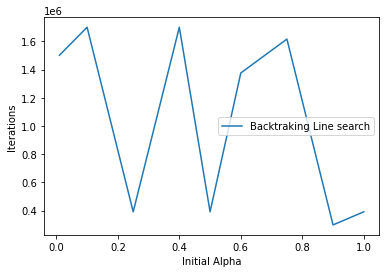

In [ ]:
my_start_x = np.array([5,5])
my_tol= 10e-9

alpha_arr = np.array([1,0.9,0.75, 0.6,0.5,0.4,0.25,0.1,0.01])
rho_ = 0.5
gamma_ = 0.5

x_arr_bls = []
iter_bls = []

for i in alpha_arr:

  x, k = find_minimizer(my_start_x,my_tol,i, rho_, gamma_)
  x_arr_bls.append(x)
  iter_bls.append(k)


df = pd.DataFrame(columns=['alpha', 'x_bls', 'f(x_bls)','iterations_bls'])

df['alpha'] = alpha_arr
df['x_bls'] = x_arr_bls
df['f(x_bls)'] = df['x_bls'].apply(evalf)
df['iterations_bls'] = iter_bls


display(df)

print('\n\n')
plt.plot(alpha_arr, iter_bls, label='Backtraking Line search')
plt.xlabel('Initial Alpha')
plt.ylabel('Iterations')
plt.legend()
plt.show()





***Remarks :*** *We observe that the number of iteration does not follow a certain pattern in this graph. First there is a steep decline in the number of itertions as we increase the size of the alpha but then again it starts increasing as we move the alpha value further. Altough the algorith do reach an optimum solution which exist at (2,4).*

# ***Part 6:*** *Behavior of the backtracking linesearch algorithm for different choices of $\rho$*

$\alpha^0 = 1$

$x^0 = (5,5)$

$\tau = 10^{-9} $

$\rho \in \{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\} $

$\gamma =0.5$



,rho,x_bls,f(x_bls),iterations_bls,x_els,f(x_els),iterations_els
0,0.90,"[2.000000020583484, 4.000000082338755]",4.237030e-16,90362,NaN,NaN,NaN
1,0.80,"[2.0000000204452597, 4.000000081785697]",4.180303e-16,393788,NaN,NaN,NaN
2,0.75,"[2.0000000204566835, 4.0000000818314]",4.184977e-16,969646,NaN,NaN,NaN
3,0.60,"[2.0000000200642654, 4.000000080262061]",4.025997e-16,1085752,NaN,NaN,NaN
4,0.50,"[2.000000020518148, 4.000000082077307]",4.210166e-16,391800,NaN,NaN,NaN
5,0.40,"[2.000000019891161, 4.000000079569643]",3.956833e-16,1888461,NaN,NaN,NaN
6,0.25,"[2.0000000186762388, 4.000000074708837]",3.488170e-16,2557250,NaN,NaN,NaN
7,0.10,"[2.000000018951605, 4.000000075811355]",3.591877e-16,3699964,NaN,NaN,NaN
8,0.01,"[2.000000017496004, 4.000000069987492]",3.061222e-16,30581673,NaN,NaN,NaN


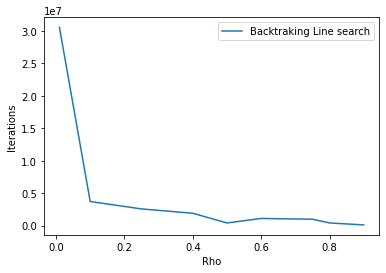

In [4]:
my_start_x = np.array([5.0,5.0])
my_tol= 10e-9

alpha_initial = 1.0
rho_arr = np.array([0.9, 0.8, 0.75, 0.6,0.5,0.4,0.25,0.1,0.01])
gamma_ = 0.5

x_arr_bls = []
iter_bls = []

for i in rho_arr:

  x, k = find_minimizer(my_start_x,my_tol,alpha_initial,i, gamma_ )
  x_arr_bls.append(x)
  iter_bls.append(k)

df = pd.DataFrame(columns=['rho', 'x_bls', 'f(x_bls)','iterations_bls', 'x_els', 'f(x_els)', 'iterations_els'])

df['rho'] = rho_arr
df['x_bls'] = x_arr_bls
df['f(x_bls)'] = df['x_bls'].apply(evalf)
df['iterations_bls'] = iter_bls

display(df)

print('\n\n')
plt.plot(rho_arr, iter_bls, label='Backtraking Line search')
plt.xlabel('Rho')
plt.ylabel('Iterations')
plt.legend()
plt.show()



***Remarks :*** *We observe that the number of iteration decreases as we keep on increasing the value of the rho. Also the number of iteraitions performed is very large for the initial value of rho.*